In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Step 2: Load dataset
# Using Titanic dataset from seaborn
import seaborn as sns
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [13]:
# Step 3: Data preprocessing
# Drop columns with too many missing values or irrelevant
df = df.drop(['deck', 'embark_town', 'alive'], axis=1)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert categorical variables to numerical
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
df['class'] = df['class'].map({'Third': 3, 'Second': 2, 'First': 1})
df['who'] = df['who'].map({'man': 0, 'woman': 1, 'child': 2})
df['alone'] = df['alone'].astype(int)

df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22.0,1,0,7.2500,0,3,0,True,0
1,1,1,1,38.0,1,0,71.2833,1,1,1,False,0
2,1,3,1,26.0,0,0,7.9250,0,3,1,False,1
3,1,1,1,35.0,1,0,53.1000,0,1,1,False,0
4,0,3,0,35.0,0,0,8.0500,0,3,0,True,1


In [15]:
# Step 4: Split the data
X = df.drop("survived", axis=1)
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 5: Train the Decision Tree model
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Accuracy: 0.7202797202797203

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.78        80
           1       0.76      0.54      0.63        63

    accuracy                           0.72       143
   macro avg       0.73      0.70      0.70       143
weighted avg       0.73      0.72      0.71       143



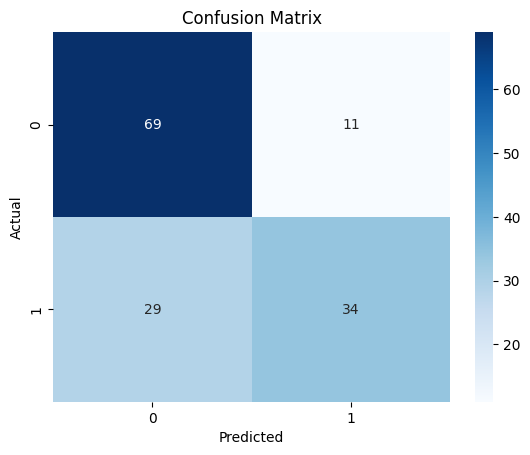

In [16]:
# Step 6: Predictions and evaluation
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


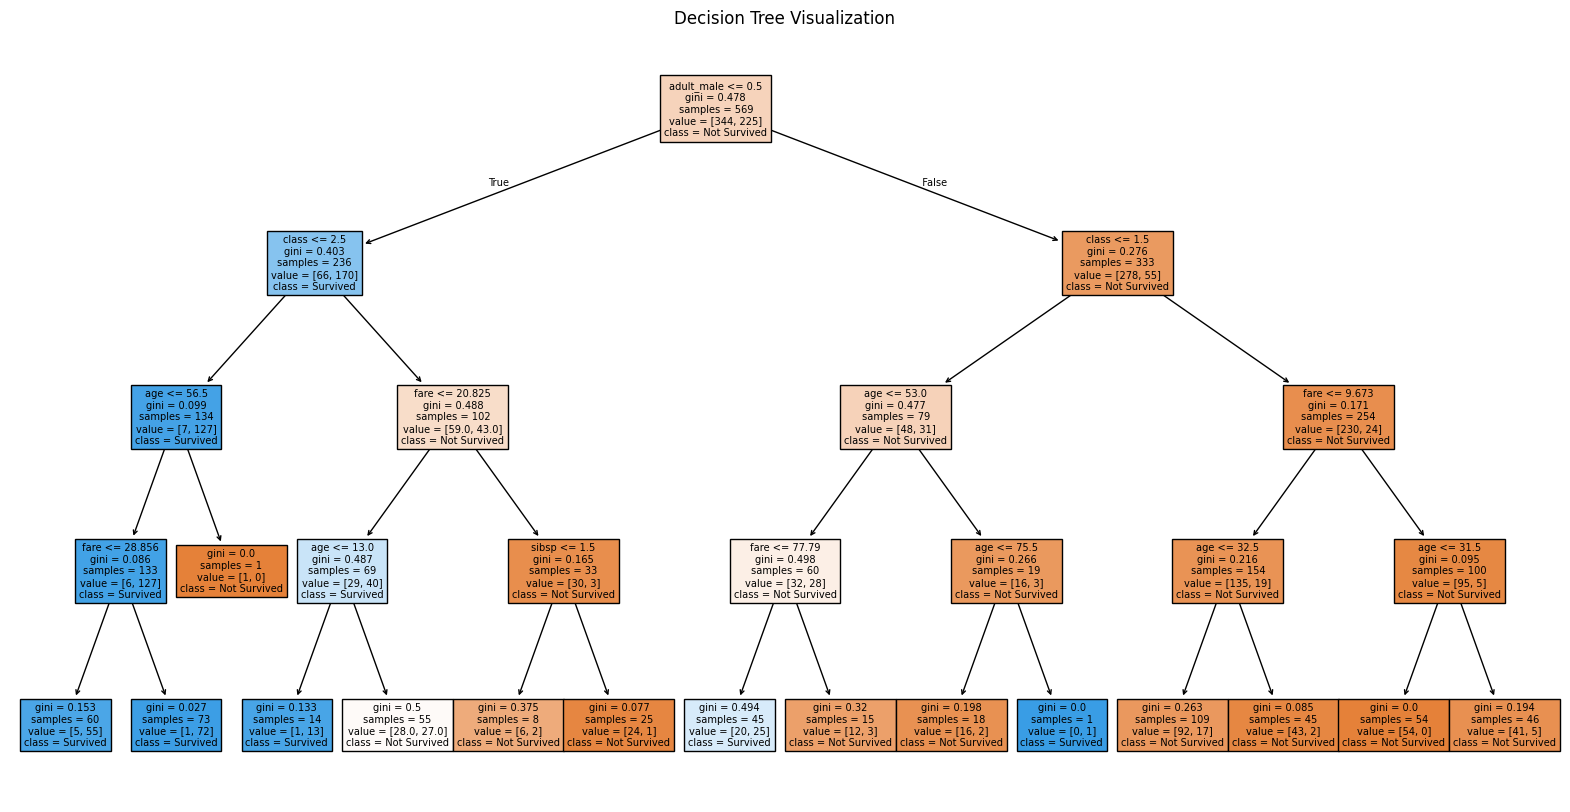

In [10]:
# Step 7: Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["Not Survived", "Survived"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()
